In [ ]:
import pandas as pd
import numpy as np

# Contoh DataFrame dasar
df = pd.DataFrame({
    "id": [1, 2, 3, 4],
    "kategori": ["A", "B", "A", "C"],
    "nilai": [10.5, 20.1, np.nan, 15.7],
    "tanggal": pd.date_range("2025-01-01", periods=4, freq="D")
})
print("=== DataFrame Awal ===")
print(df)


=== DataFrame Awal ===
   id kategori  nilai    tanggal
0   1        A   10.5 2025-01-01
1   2        B   20.1 2025-01-02
2   3        A    NaN 2025-01-03
3   4        C   15.7 2025-01-04


In [ ]:
# ------------------------------
# 1. ArrowDtype, StringDtype, Int32Dtype, Float64Dtype
# ------------------------------
df = df.astype({
    "id": "Int32",         # nullable integer
    "kategori": "string",  # string dtype (lebih modern dari object)
    "nilai": "Float64"     # nullable float
})
print("\n=== Dengan dtype khusus ===")
print(df.dtypes)


=== Dengan dtype khusus ===
id                   Int32
kategori    string[python]
nilai              Float64
tanggal     datetime64[ns]
dtype: object


In [ ]:
# ------------------------------
# 2. Categorical / CategoricalDtype
# ------------------------------
df["kategori"] = df["kategori"].astype(pd.CategoricalDtype(categories=["A", "B", "C"]))
print("\n=== Kolom kategori jadi Categorical ===")
print(df["kategori"])


=== Kolom kategori jadi Categorical ===
0    A
1    B
2    A
3    C
Name: kategori, dtype: category
Categories (3, object): ['A', 'B', 'C']


In [ ]:
# ------------------------------
# 3. DatetimeIndex / PeriodIndex / TimedeltaIndex
# ------------------------------
df = df.set_index("tanggal")
print("\n=== Pakai DatetimeIndex ===")
print(df)

# Buat PeriodIndex
period_index = pd.period_range("2025-01", periods=4, freq="M")
print("\n=== PeriodIndex contoh ===")
print(period_index)


=== Pakai DatetimeIndex ===
            id kategori  nilai
tanggal                       
2025-01-01   1        A   10.5
2025-01-02   2        B   20.1
2025-01-03   3        A   <NA>
2025-01-04   4        C   15.7

=== PeriodIndex contoh ===
PeriodIndex(['2025-01', '2025-02', '2025-03', '2025-04'], dtype='period[M]')


In [ ]:
# ------------------------------
# 4. MultiIndex
# ------------------------------
df_multi = df.set_index([df.index, "kategori"])
print("\n=== MultiIndex ===")
print(df_multi)


=== MultiIndex ===
                     id  nilai
tanggal    kategori           
2025-01-01 A          1   10.5
2025-01-02 B          2   20.1
2025-01-03 A          3   <NA>
2025-01-04 C          4   15.7


In [ ]:
# ------------------------------
# 5. Interval / IntervalIndex
# ------------------------------
intervals = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30)])
print("\n=== IntervalIndex contoh ===")
print(intervals)


=== IntervalIndex contoh ===
IntervalIndex([(0, 10], (10, 20], (20, 30]], dtype='interval[int64, right]')


In [ ]:
# ------------------------------
# 6. Grouper + groupby
# ------------------------------
df_group = df.groupby(pd.Grouper(freq="D")).sum(numeric_only=True)
print("\n=== Groupby pakai Grouper (per hari) ===")
print(df_group)


=== Groupby pakai Grouper (per hari) ===
            id  nilai
tanggal              
2025-01-01   1   10.5
2025-01-02   2   20.1
2025-01-03   3    0.0
2025-01-04   4   15.7


In [ ]:
# ------------------------------
# 7. isna, notna
# ------------------------------
print("\n=== Cek missing values ===")
print(df["nilai"].isna())


=== Cek missing values ===
tanggal
2025-01-01    False
2025-01-02    False
2025-01-03     True
2025-01-04    False
Name: nilai, dtype: bool


In [ ]:
# ------------------------------
# 8. merge, concat
# ------------------------------
df2 = pd.DataFrame({"id": [1, 2], "status": ["ok", "fail"]})
merged = df.reset_index().merge(df2, on="id", how="left")
print("\n=== Hasil merge ===")
print(merged)

df_concat = pd.concat([df.reset_index(), df2], axis=0, ignore_index=True)
print("\n=== Hasil concat ===")
print(df_concat)


=== Hasil merge ===
     tanggal  id kategori  nilai status
0 2025-01-01   1        A   10.5     ok
1 2025-01-02   2        B   20.1   fail
2 2025-01-03   3        A   <NA>    NaN
3 2025-01-04   4        C   15.7    NaN

=== Hasil concat ===
     tanggal  id kategori  nilai status
0 2025-01-01   1        A   10.5    NaN
1 2025-01-02   2        B   20.1    NaN
2 2025-01-03   3        A   <NA>    NaN
3 2025-01-04   4        C   15.7    NaN
4        NaT   1      NaN   <NA>     ok
5        NaT   2      NaN   <NA>   fail


In [ ]:
# ------------------------------
# 9. pivot, melt
# ------------------------------
pivoted = merged.pivot(index="id", columns="status", values="nilai")
print("\n=== Pivot ===")
print(pivoted)

melted = pd.melt(merged, id_vars=["id"], value_vars=["nilai", "status"])
print("\n=== Melt ===")
print(melted)



=== Pivot ===
status   NaN  fail    ok
id                      
1       <NA>  <NA>  10.5
2       <NA>  20.1  <NA>
3       <NA>  <NA>  <NA>
4       15.7  <NA>  <NA>

=== Melt ===
   id variable value
0   1    nilai  10.5
1   2    nilai  20.1
2   3    nilai  <NA>
3   4    nilai  15.7
4   1   status    ok
5   2   status  fail
6   3   status   NaN
7   4   status   NaN


In [ ]:
# ------------------------------
# 10. read_csv / to_csv (I/O)
# ------------------------------
df.to_csv("contoh.csv", index=False)
df_loaded = pd.read_csv("contoh.csv")


📌 Dari contoh di atas, sudah mencakup:

* **Dtype khusus**: `ArrowDtype`, `Int32Dtype`, `Float64Dtype`, `StringDtype`, `CategoricalDtype`.
* **Index khusus**: `DatetimeIndex`, `PeriodIndex`, `MultiIndex`, `IntervalIndex`.
* **Fungsi umum**: `isna`, `notna`, `merge`, `concat`, `pivot`, `melt`, `groupby` dengan `Grouper`.
* **I/O**: `read_csv`, `to_csv`.



 tabel ringkas berisi **beberapa fungsi/tipe penting dari pandas** yang relevan untuk **implementasi ke DataFrame** yang paling sering dipakai dan langsung bisa dicoba.

---

### 📑 Tabel Ringkas Fungsi / Objek Penting Pandas

| Nama              | Jenis         | Deskripsi                            | Contoh Implementasi                               |
| ----------------- | ------------- | ------------------------------------ | ------------------------------------------------- |
| **DataFrame**     | Struktur data | Tabel 2D mirip Excel (baris & kolom) | `df = pd.DataFrame({"A":[1,2],"B":[3,4]})`        |
| **Series**        | Struktur data | Kolom tunggal (1D)                   | `s = pd.Series([10,20,30])`                       |
| **Index**         | Objek index   | Label baris                          | `df.index`                                        |
| **MultiIndex**    | Objek index   | Index bertingkat (multi-level)       | `df.set_index(["A","B"])`                         |
| **Categorical**   | Tipe data     | Kolom kategori                       | `pd.Categorical(["tinggi","sedang","rendah"])`    |
| **DatetimeIndex** | Tipe data     | Index berbasis tanggal               | `pd.date_range("2025-01-01", periods=5)`          |
| **PeriodIndex**   | Tipe data     | Rentang periode (misal bulanan)      | `pd.period_range("2025-01", periods=3, freq="M")` |
| **RangeIndex**    | Tipe data     | Index berupa range angka             | `pd.RangeIndex(start=0, stop=10, step=1)`         |
| **Timestamp**     | Tipe data     | Representasi waktu tunggal           | `pd.Timestamp("2025-08-19")`                      |
| **Timedelta**     | Tipe data     | Selisih waktu                        | `pd.Timedelta("2 days")`                          |
| **ExcelFile**     | IO            | Baca file Excel                      | `pd.ExcelFile("data.xlsx")`                       |
| **read\_csv**     | IO            | Membaca file CSV ke DataFrame        | `pd.read_csv("data.csv")`                         |
| **read\_excel**   | IO            | Membaca Excel ke DataFrame           | `pd.read_excel("data.xlsx")`                      |
| **merge**         | Transformasi  | Gabung DataFrame (SQL join)          | `pd.merge(df1, df2, on="id")`                     |
| **concat**        | Transformasi  | Gabung DataFrame (axis 0/1)          | `pd.concat([df1, df2])`                           |
| **pivot\_table**  | Transformasi  | Buat pivot table                     | `df.pivot_table(values="A", index="B")`           |
| **melt**          | Transformasi  | Ubah wide → long format              | `pd.melt(df, id_vars=["A"])`                      |
| **cut / qcut**    | Transformasi  | Membagi data numerik jadi bin        | `pd.cut(df["A"], bins=3)`                         |
| **get\_dummies**  | Transformasi  | One-hot encoding                     | `pd.get_dummies(df["kategori"])`                  |
| **isna / notna**  | Analisis      | Cek missing values                   | `df.isna()`                                       |
| **value\_counts** | Analisis      | Hitung frekuensi nilai               | `df["A"].value_counts()`                          |
| **describe**      | Analisis      | Statistik ringkas                    | `df.describe()`                                   |

---

👉 Dari daftar panjang yang kamu kasih, sebagian besar itu **tipe data** (kayak `Int64Dtype`, `StringDtype`, `Categorical`), dan sebagian lagi itu **fungsi IO** (kayak `read_csv`, `read_excel`), atau **fungsi transformasi data** (kayak `melt`, `merge`, `pivot`).



In [ ]:
import pandas as pd

# DataFrame dasar
df = pd.DataFrame({
    "Nama": ["Ari", "Niken", "Erika", "Doni"],
    "Umur": [23, 25, 22, 24],
    "Kelas": ["kejang", "tidak kejang", "kejang", "tidak kejang"],
    "Nilai": [80, 90, 85, 70]
})

print("=== DataFrame Awal ===")
print(df)

=== DataFrame Awal ===
    Nama  Umur         Kelas  Nilai
0    Ari    23        kejang     80
1  Niken    25  tidak kejang     90
2  Erika    22        kejang     85
3   Doni    24  tidak kejang     70


In [ ]:
# 1. Series (ambil 1 kolom)
print(df["Umur"])

0    23
1    25
2    22
3    24
Name: Umur, dtype: int64


In [ ]:
# 2. Index
print(df.index)

RangeIndex(start=0, stop=4, step=1)


In [ ]:
# 3. Categorical
df["Kelas"] = pd.Categorical(df["Kelas"])
print(df["Kelas"])

0          kejang
1    tidak kejang
2          kejang
3    tidak kejang
Name: Kelas, dtype: category
Categories (2, object): ['kejang', 'tidak kejang']


In [ ]:
# 4. DatetimeIndex
tanggal = pd.date_range("2025-01-01", periods=4)
print(tanggal)

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04'], dtype='datetime64[ns]', freq='D')


In [ ]:
# 5. PeriodIndex
periode = pd.period_range("2025-01", periods=4, freq="M")
print(periode)

PeriodIndex(['2025-01', '2025-02', '2025-03', '2025-04'], dtype='period[M]')


In [ ]:
# 6. RangeIndex
print(pd.RangeIndex(start=0, stop=10, step=2))

RangeIndex(start=0, stop=10, step=2)


In [ ]:
# 7. Timestamp
print(pd.Timestamp("2025-08-19"))

2025-08-19 00:00:00


In [ ]:
# 8. Timedelta
print(pd.Timedelta("5 days"))

5 days 00:00:00


In [ ]:
# 9. value_counts
print(df["Kelas"].value_counts())

Kelas
kejang          2
tidak kejang    2
Name: count, dtype: int64


In [ ]:
# 10. describe
print(df.describe())

            Umur      Nilai
count   4.000000   4.000000
mean   23.500000  81.250000
std     1.290994   8.539126
min    22.000000  70.000000
25%    22.750000  77.500000
50%    23.500000  82.500000
75%    24.250000  86.250000
max    25.000000  90.000000


In [ ]:
# 11. isna / notna
print(df.isna())

    Nama   Umur  Kelas  Nilai
0  False  False  False  False
1  False  False  False  False
2  False  False  False  False
3  False  False  False  False


In [ ]:
# 12. cut / qcut
print(pd.cut(df["Umur"], bins=2))

0    (21.997, 23.5]
1      (23.5, 25.0]
2    (21.997, 23.5]
3      (23.5, 25.0]
Name: Umur, dtype: category
Categories (2, interval[float64, right]): [(21.997, 23.5] < (23.5, 25.0]]


In [ ]:
# 13. get_dummies (one-hot encoding)
print(pd.get_dummies(df["Kelas"]))

   kejang  tidak kejang
0    True         False
1   False          True
2    True         False
3   False          True


In [ ]:
# 14. merge (gabungkan 2 dataframe)
df2 = pd.DataFrame({
    "Nama": ["Ari", "Niken", "Erika", "Doni"],
    "Asal": ["Bandar Lampung", "Metro", "Pringsewu", "Lampung Timur"]
})
print(pd.merge(df, df2, on="Nama"))

    Nama  Umur         Kelas  Nilai            Asal
0    Ari    23        kejang     80  Bandar Lampung
1  Niken    25  tidak kejang     90           Metro
2  Erika    22        kejang     85       Pringsewu
3   Doni    24  tidak kejang     70   Lampung Timur


In [ ]:
# 15. concat
df3 = pd.DataFrame({"Nama": ["Lina"], "Umur": [21], "Kelas": ["kejang"], "Nilai": [88]})
print(pd.concat([df, df3], ignore_index=True))

    Nama  Umur         Kelas  Nilai
0    Ari    23        kejang     80
1  Niken    25  tidak kejang     90
2  Erika    22        kejang     85
3   Doni    24  tidak kejang     70
4   Lina    21        kejang     88


In [ ]:
# 16. melt (wide -> long)
print(pd.melt(df, id_vars=["Nama"], value_vars=["Umur", "Nilai"]))

    Nama variable  value
0    Ari     Umur     23
1  Niken     Umur     25
2  Erika     Umur     22
3   Doni     Umur     24
4    Ari    Nilai     80
5  Niken    Nilai     90
6  Erika    Nilai     85
7   Doni    Nilai     70


In [ ]:
# 17. pivot_table
print(df.pivot_table(values="Nilai", index="Kelas", aggfunc="mean"))

              Nilai
Kelas              
kejang         82.5
tidak kejang   80.0


/tmp/ipython-input-3750835171.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  print(df.pivot_table(values="Nilai", index="Kelas", aggfunc="mean"))


📌 Dari kode di atas:

* Kamu bisa lihat langsung bagaimana **fungsi pandas dipakai ke DataFrame**.
* Yang tipe data (kayak `Categorical`, `DatetimeIndex`, `Timestamp`) biasanya dipakai buat **preprocessing / manipulasi data**.
* Yang fungsi (kayak `merge`, `concat`, `pivot_table`) dipakai buat **transformasi data**.


#Perbedaan`{}`, `[]`, dan `()`
---

## 1️⃣ Kurung **{ }** → **Dictionary** atau **Set**

### 🔹 Dictionary (`dict`)

* Tipe data pasangan **key : value**
* Dipakai kalau kita butuh mapping (hubungan antar data)

```python
# Dictionary
mahasiswa = {"nama": "Ari", "umur": 21, "jurusan": "Data Science"}
print(mahasiswa["nama"])   # ambil value berdasarkan key
```

Output:

```
Ari
```

---

### 🔹 Set (`set`)

* Kumpulan data **unik** (tidak ada duplikat)
* Biasanya dipakai untuk operasi matematika: irisan, gabungan, dll.

```python
angka = {1, 2, 3, 3, 4}
print(angka)  # duplikat otomatis hilang
```

Output:

```
{1, 2, 3, 4}
```

---

## 2️⃣ Kurung **\[ ]** → **List**

* Koleksi data yang **berurutan** dan **bisa diubah** (mutable).
* Bisa berisi campuran tipe data.
* Dipakai kalau kita ingin menampung data sejenis dalam urutan.

```python
buah = ["apel", "jeruk", "mangga"]
buah.append("pisang")  # tambah item
print(buah)         # akses elemen pertama
```

Output:

```
['apel', 'jeruk', 'mangga', 'pisang']
```

---

## 3️⃣ Kurung **( )** → **Tuple** atau **Fungsi**

### 🔹 Tuple (`tuple`)

* Mirip list, **tapi tidak bisa diubah** (immutable).
* Cocok dipakai untuk data yang sifatnya tetap.

```python
koordinat = (10, 20)
print(koordinat[0])  # akses elemen
```

Output:

```
10
```

---

### 🔹 Fungsi

Kurung `()` juga dipakai saat **memanggil fungsi**.

```python
def halo():
    return "Halo Dunia!"

print(halo())   # pakai () untuk memanggil
```

---

## 📌 Perbedaan Utama

| Simbol | Nama       | Contoh             | Bisa diubah? | Kapan dipakai                  |
| ------ | ---------- | ------------------ | ------------ | ------------------------------ |
| `{ }`  | Dictionary | `{"a": 1, "b": 2}` | Ya           | Data dengan pasangan key-value |
| `{ }`  | Set        | `{1, 2, 3}`        | Ya           | Data unik, operasi himpunan    |
| `[ ]`  | List       | `[1, 2, 3]`        | Ya           | Data berurutan, fleksibel      |
| `( )`  | Tuple      | `(1, 2, 3)`        | Tidak        | Data tetap, koordinat, dsb     |
| `( )`  | Fungsi     | `fungsi()`         | -            | Memanggil fungsi               |



# **struktur data**

## 🔹 Struktur Data Bawaan Python

1. **List** → `[1, 2, 3]` → bisa menampung tipe data campuran.
2. **Tuple** → `(1, 2, 3)` → mirip list, tapi **immutable** (tidak bisa diubah).
3. **Set** → `{1, 2, 3}` → kumpulan data unik, tidak ada duplikat.
4. **Dict (dictionary)** → `{"nama": "Meliza", "usia": 22}` → pasangan key–value.
5. **String** → `"teks biasa"`, juga bisa dianggap struktur data (urutan karakter).
6. **Range** → `range(5)` → menghasilkan deret angka.

---

## 🔹 Struktur Data dari NumPy

1. **ndarray (array multidimensi)** → `np.array([[1,2],[3,4]])`
2. **Matrix (np.matrix)** → khusus untuk operasi aljabar linear (jarang dipakai sekarang, lebih disarankan pakai `ndarray`).
3. **Masked Array** → `np.ma.array()` → array dengan nilai yang bisa ditandai sebagai hilang/invalid.

---

## 🔹 Struktur Data dari Pandas

1. **Series** → data 1D (mirip list tapi ada index).
2. **DataFrame** → data 2D (mirip tabel Excel).
3. **Panel** (sudah deprecated) → dulu untuk data 3D.

---

## 🔹 Struktur Data dari Python Lainnya

* **Deque** (dari `collections`) → list dua arah yang cepat (`collections.deque`).
* **OrderedDict**, **defaultdict**, **Counter** (dari `collections`).
* **Heap queue (heapq)** → struktur data heap/priority queue.
* **Queue** (dari `queue`) → antrian FIFO/LIFO.

---

## 🔹 Struktur Data untuk Data Science / Machine Learning

* **Tensor** → dari PyTorch / TensorFlow (mirip array NumPy tapi mendukung GPU).
* **Sparse Matrix** → dari `scipy.sparse` (efisien untuk data jarang).
* **Dask DataFrame / Array** → versi paralel dari Pandas/NumPy untuk big data.

---

✨ Jadi intinya:

* Kalau **umum Python** → list, tuple, set, dict
* Kalau **numerik** → NumPy array, tensor
* Kalau **data tabular** → Pandas DataFrame, Series
* Kalau **khusus** → queue, heap, sparse matrix, dll




# 🔹 Struktur Data Bawaan Python

### 1. **List**

```python
# List: urutan data, bisa diubah
my_list = [1, 2, 3, "teks", 4.5]
print(my_list)         # [1, 2, 3, 'teks', 4.5]
print(my_list[2])      # 3
```

📌 Dipakai kalau kamu butuh menyimpan banyak data dalam satu variabel dan bisa sering diubah.

---

### 2. **Tuple**

```python
# Tuple: mirip list tapi tidak bisa diubah
my_tuple = (1, 2, 3)
print(my_tuple)        # (1, 2, 3)
# my_tuple[0] = 10     # ❌ Error, tuple immutable
```

📌 Cocok untuk data yang tetap (misalnya koordinat `(x, y)`).

---

### 3. **Set**

```python
# Set: data unik, tidak berurutan
my_set = {1, 2, 3, 2, 1}
print(my_set)          # {1, 2, 3}
```

📌 Dipakai kalau ingin menghapus duplikat otomatis atau operasi himpunan (union, intersection).

---

### 4. **Dictionary (dict)**

```python
# Dict: pasangan key-value
my_dict = {"nama": "Meliza", "usia": 22}
print(my_dict["nama"]) # Meliza
```

📌 Dipakai kalau butuh mapping key → value (mirip JSON).

---

### 5. **String**

```python
# String: kumpulan karakter
s = "Halo"
print(s[1])       # a
print(s.upper())  # HALO
```

📌 Digunakan untuk teks.

---

### 6. **Range**

```python
# Range: deret angka
for i in range(5):
    print(i, end=" ")  # 0 1 2 3 4
```

📌 Sering dipakai untuk looping.

---

# 🔹 Struktur Data NumPy

### 7. **ndarray (array multidimensi)**

```python
import numpy as np

arr = np.array([[1, 2, 3],
                [4, 5, 6]])
print(arr.shape)   # (2, 3)
```

📌 Digunakan untuk komputasi numerik, lebih efisien dari list.

---

### 8. **Matrix**

```python
m = np.matrix([[1, 2], [3, 4]])
print(m * m)  # perkalian matriks
```

📌 Fokus untuk operasi aljabar linear. Tapi sekarang lebih disarankan pakai `ndarray`.

---

### 9. **Masked Array**

```python
masked = np.ma.array([1, 2, 3], mask=[0, 1, 0])
print(masked)      # [1 -- 3]
```

📌 Digunakan kalau ada data hilang/invalid.

---

# 🔹 Struktur Data Pandas

### 10. **Series**

```python
import pandas as pd

s = pd.Series([10, 20, 30], index=["a", "b", "c"])
print(s["b"])   # 20
```

📌 Data 1D dengan label index → mirip dictionary.

---

### 11. **DataFrame**

```python
df = pd.DataFrame({
    "A": [1, 2, 3],
    "B": [4, 5, 6]
})
print(df)
```

📌 Data tabular 2D → mirip Excel. Cocok untuk analisis data.

---

# 🔹 Struktur Data Koleksi Python

### 12. **Deque**

```python
from collections import deque

dq = deque([1, 2, 3])
dq.appendleft(0)
dq.append(4)
print(dq)  # deque([0, 1, 2, 3, 4])
```

📌 Antrian 2 arah, cepat untuk operasi di awal & akhir list.

---

### 13. **OrderedDict**

```python
from collections import OrderedDict

od = OrderedDict()
od["a"] = 1
od["b"] = 2
print(od)  # OrderedDict([('a', 1), ('b', 2)])
```

📌 Dictionary dengan urutan terjaga (sekarang dict biasa juga sudah mempertahankan urutan di Python 3.7+).

---

### 14. **defaultdict**

```python
from collections import defaultdict

dd = defaultdict(int)
dd["a"] += 1
print(dd["a"])  # 1
print(dd["b"])  # 0 (default)
```

📌 Dipakai kalau sering akses key yang mungkin belum ada.

---

### 15. **Counter**

```python
from collections import Counter

c = Counter("banana")
print(c)  # Counter({'a': 3, 'n': 2, 'b': 1})
```

📌 Hitung frekuensi item secara cepat.

---

# 🔹 Struktur Data Khusus

### 16. **Heap Queue (heapq)**

```python
import heapq

nums = [5, 1, 8, 3]
heapq.heapify(nums)
print(nums)  # [1, 3, 8, 5] (min-heap)
```

📌 Cocok untuk priority queue.

---

### 17. **Queue**

```python
from queue import Queue

q = Queue()
q.put(1)
q.put(2)
print(q.get())  # 1
```

📌 Untuk antrian FIFO (First In First Out).

---

# 🔹 Struktur Data Machine Learning / Big Data

### 18. **Tensor (PyTorch)**

```python
import torch

t = torch.tensor([[1, 2], [3, 4]])
print(t)
```

📌 Mirip NumPy array tapi mendukung GPU → dipakai di Deep Learning.

---

### 19. **Sparse Matrix**

```python
from scipy.sparse import csr_matrix

sparse = csr_matrix([[0, 0, 3], [4, 0, 0]])
print(sparse)
```

📌 Cocok untuk data besar yang banyak nol (contoh: NLP, grafik).

---

### 20. **Dask DataFrame**

```python
import dask.dataframe as dd

df = dd.from_pandas(pd.DataFrame({"A": range(100)}), npartitions=4)
print(df.head())
```

📌 Mirip Pandas tapi untuk big data (lebih efisien & paralel).

---

# ✨ Ringkasan Kapan Dipakai

* **List, Tuple, Dict, Set** → dasar Python, fleksibel.
* **NumPy array** → komputasi numerik cepat.
* **Pandas Series/DataFrame** → analisis data tabular.
* **Deque, defaultdict, Counter** → manipulasi data khusus.
* **Tensor** → deep learning.
* **Sparse Matrix** → data besar dengan banyak nol.
* **Dask DataFrame** → big data paralel.



# **library, package, module, class, fungsi**.

---

## 📌 1. **Library**

👉 Istilah **library** lebih umum, maksudnya sekumpulan **package** atau **module** yang sudah dibuat orang lain untuk kita pakai.

* **Contoh:** `NumPy` adalah **library** Python untuk komputasi numerik.
* Jadi, kalau orang bilang “library NumPy”, artinya keseluruhan isi NumPy (isinya banyak modul dan subpackage).

---

## 📌 2. **Package**

👉 **Package** = folder/direktori Python yang berisi beberapa **module** + ada file `__init__.py`.

* Dalam **NumPy**, ada banyak package kecil.

  * contoh: `numpy.fft` (untuk Fourier),
  * `numpy.linalg` (untuk aljabar linear).
* Jadi package itu **organisasi kode** dalam bentuk folder.

---

## 📌 3. **Module**

👉 **Module** = file `.py` tunggal berisi kode Python (fungsi, kelas, variabel).

* Contoh: `numpy.core`, `numpy.fft._pocketfft`, dll.
* Kalau kita `import numpy as np`, sebenarnya Python memuat banyak **module** dari package `numpy`.

---

## 📌 4. **Class**

👉 **Class** = blueprint untuk membuat objek. Ada banyak class di NumPy.

* Contoh: `numpy.ndarray` → class utama yang dipakai NumPy untuk array.
* Kalau kamu buat array:

  ```python
  a = np.array([1,2,3])
  print(type(a))
  ```

  Outputnya: `<class 'numpy.ndarray'>`
  👉 artinya `a` adalah **objek dari class `ndarray`**.

---

## 📌 5. **Fungsi**

👉 **Fungsi** = sekumpulan perintah yang bisa dipanggil.

* Contoh fungsi di NumPy: `np.array()`, `np.mean()`, `np.hanning()`, dll.
* Misalnya:

  ```python
  arr = np.array([1, 2, 3])   # fungsi
  print(np.mean(arr))         # fungsi mean()
  ```

---

## 🔎 Ringkasan Bedanya

| Istilah     | Definisi singkat                     | Contoh dalam `numpy`        |
| ----------- | ------------------------------------ | --------------------------- |
| **Library** | Kumpulan package/module              | `NumPy` secara keseluruhan  |
| **Package** | Folder berisi module (`__init__.py`) | `numpy.fft`, `numpy.linalg` |
| **Module**  | File `.py` dengan kode               | `numpy/core/_methods.py`    |
| **Class**   | Blueprint objek                      | `numpy.ndarray`             |
| **Fungsi**  | Perintah siap pakai                  | `np.array()`, `np.mean()`   |

---

### 📊 Contoh nyata dalam kode

```python
import numpy as np

# Fungsi
arr = np.array([1, 2, 3])   # np.array() adalah fungsi

# Class
print(type(arr))            # <class 'numpy.ndarray'>

# Package
import numpy.fft            # numpy.fft adalah package untuk Fourier

# Module (file python tunggal dalam numpy)
import numpy.core           # ini module inti numpy
```

---

⚡ Jadi:

* **NumPy** → library.
* **numpy.fft** → package.
* **numpy.core** → module.
* **numpy.ndarray** → class.
* **np.array()** → fungsi.



# rapihin


## 1️⃣ Struktur Data Utama

Ini inti dari Pandas — dua tipe data yang dipakai hampir di semua pekerjaan:

* **`Series`** → data 1 dimensi (mirip list, tapi dengan label/index).
* **`DataFrame`** → data 2 dimensi (mirip tabel Excel dengan baris dan kolom).
* **`Index`** → objek yang menyimpan label untuk baris/kolom.

## 2️⃣ Membaca & Menyimpan Data (I/O)

Pandas punya fungsi untuk **membaca (read)** dan **menulis (to)** berbagai format:

* Membaca → `pd.read_csv("tempat dan nama data")`,
* Menyimpan → `df.to_csv("nama file data yang akan disimpan")`


## 3️⃣ Indexing, Selecting, Filtering

* `.loc[]` → pilih berdasarkan label.
* `.iloc[]` → pilih berdasarkan posisi indeks.
* Boolean indexing → `df[df['kolom'] > 10]`
* `.at[]`, `.iat[]` → ambil data super cepat untuk 1 sel.


## 4️⃣ Manipulasi Data

* Tambah / hapus kolom → `df['baru'] = ...`, `df.drop()`
* Rename kolom → `df.rename(columns=...)`
* Sortir → `df.sort_values()`, `df.sort_index()`
* Ubah index → `df.set_index()`, `df.reset_index()`
* Replace nilai → `df.replace()`
* Fill missing value → `df.fillna()`
* Drop missing value → `df.dropna()`


## 5️⃣ Agregasi & Statistik

* `.sum()`, `.mean()`, `.median()`, `.std()`
* `.min()`, `.max()`
* `.describe()` → ringkasan statistik
* `.value_counts()` → hitung jumlah unik


## 6️⃣ Grouping & Pivot

* `groupby()` → kelompokkan data lalu agregasi.
* `pivot()` dan `pivot_table()` → ubah format tabel.
* `melt()` → ubah tabel lebar ke format panjang.

## 7️⃣ Waktu & Tanggal

* `to_datetime()` → konversi ke tipe waktu.
* `.dt` accessor → ambil tahun, bulan, hari, jam, dll.
* Resampling data time-series → `resample()`


## 8️⃣ Merge & Join Data

* `merge()` → gabungkan seperti SQL join.
* `concat()` → gabungkan vertikal/horizontal.
* `join()` → gabung berdasarkan index.


## 9️⃣ Fungsi Akses Cepat & Transformasi

* `.apply()` → jalankan fungsi ke setiap baris/kolom.
* `.map()` → untuk `Series`.
* `.applymap()` → untuk semua elemen `DataFrame`.

## 🔟 Visualisasi

* `.plot()` → langsung bikin grafik dasar (pakai Matplotlib di belakang layar).

## **1️⃣ Struktur Data Utama**

* **`ndarray`** → array multidimensi (inti dari NumPy)
* **`dtype`** → tipe data (int, float, bool, complex, string, dll.)


## **2️⃣ Membuat Array**

* Dari Python list:

  * `np.array([1,2,3])`
* Array berisi nol:

  * `np.zeros(shape)`
* Array berisi satu:

  * `np.ones(shape)`
* Array dengan nilai tertentu:

  * `np.full(shape, value)`
* Array dengan urutan angka:

  * `np.arange(start, stop, step)`
  * `np.linspace(start, stop, num)`
* Array acak:

  * `np.random.rand()`, `np.random.randint()`, `np.random.normal()`


| Perintah                                 | Pengertian                                                                                        | Contoh Kode                        | Contoh Bentuk Output                                |
| ---------------------------------------- | ------------------------------------------------------------------------------------------------- | ---------------------------------- | --------------------------------------------------- |
| **`np.array([1,2,3])`**                  | Membuat array dari list Python.                                                                   | `np.array([1, 2, 3])`              | `[1 2 3]`                                           |
| **`np.zeros(shape)`**                    | Membuat array berisi **0** dengan ukuran `shape`.                                                 | `np.zeros((2, 3))`                 | <pre>\[\[0. 0. 0.]\n \[0. 0. 0.]]</pre>             |
| **`np.ones(shape)`**                     | Membuat array berisi **1** dengan ukuran `shape`.                                                 | `np.ones((3, 2))`                  | <pre>\[\[1. 1.]\n \[1. 1.]\n \[1. 1.]]</pre>        |
| **`np.full(shape, value)`**              | Membuat array dengan nilai tertentu.                                                              | `np.full((2, 2), 7)`               | <pre>\[\[7 7]\n \[7 7]]</pre>                       |
| **`np.arange(start, stop, step)`**       | Membuat array dengan urutan angka dari `start` ke `stop` (tidak termasuk `stop`), langkah `step`. | `np.arange(0, 10, 2)`              | `[0 2 4 6 8]`                                       |
| **`np.linspace(start, stop, num)`**      | Membuat array dengan **jumlah nilai tertentu** antara `start` dan `stop`.                         | `np.linspace(0, 1, 5)`             | `[0.   0.25 0.5  0.75 1.]`                          |
| **`np.random.rand(shape)`**              | Membuat array acak **uniform** di \[0, 1).                                                        | `np.random.rand(2, 3)`             | <pre>\[\[0.52 0.77 0.11]\n \[0.85 0.29 0.43]]</pre> |
| **`np.random.randint(low, high, size)`** | Membuat array acak bilangan bulat dari `low` hingga `high-1`.                                     | `np.random.randint(1, 10, (3, 3))` | <pre>\[\[4 8 3]\n \[2 9 7]\n \[1 5 6]]</pre>        |
| **`np.random.normal(loc, scale, size)`** | Membuat array acak dari distribusi normal (mean=`loc`, std dev=`scale`).                          | `np.random.normal(0, 1, (2, 2))`   | <pre>\[\[ 0.12 -0.88]\n \[ 1.45  0.33]]</pre>       |


## **3️⃣ Indexing & Slicing**

* Ambil elemen tunggal:

  * `arr[0]`, `arr[1,2]`
* Slice:

  * `arr[1:5]`, `arr[:, 0]`
* Boolean indexing:

  * `arr[arr > 5]`
* Fancy indexing:

  * `arr[[0, 2, 4]]`


## **4️⃣ Operasi Matematis**

* **Aritmatika**: `+`, `-`, `*`, `/`, `**`
* **Statistik**:

  * `np.mean()`, `np.median()`, `np.std()`, `np.var()`
* **Agregasi**:

  * `np.sum()`, `np.min()`, `np.max()`, `np.prod()`
* **Linear Algebra**:

  * `np.dot()`, `np.matmul()`, `np.linalg.inv()`, `np.linalg.eig()`
* **Trigonometri**:

  * `np.sin()`, `np.cos()`, `np.tan()`
* **Logaritma & Eksponensial**:

  * `np.log()`, `np.log10()`, `np.exp()`


## **5️⃣ Manipulasi Bentuk Array**

* Mengubah bentuk:

  * `np.reshape()`, `np.ravel()`, `np.flatten()`
* Transpose:

  * `.T` atau `np.transpose()`
* Menambah / menghapus dimensi:

  * `np.newaxis`, `np.expand_dims()`, `np.squeeze()`
* Menggabungkan array:

  * `np.concatenate()`, `np.vstack()`, `np.hstack()`
* Memotong array:

  * `np.split()`, `np.vsplit()`, `np.hsplit()`

📊 Ringkasan

| Fungsi             | Tujuan                                                        | Contoh Shape Awal → Akhir |
| ------------------ | ------------------------------------------------------------- | ------------------------- |
| `np.newaxis`       | Menambah 1 dimensi baru di posisi tertentu                    | (3,) → (3,1) atau (1,3)   |
| `np.expand_dims()` | Sama seperti `np.newaxis` tapi lebih fleksibel (pakai `axis`) | (3,) → (1,3) atau (3,1)   |
| `np.squeeze()`     | Menghapus dimensi dengan ukuran 1                             | (1,3,1) → (3,)            |


## **6️⃣ Fungsi Khusus**

* Fungsi logika:

  * `np.where()`, `np.any()`, `np.all()`
* Pengurutan:

  * `np.sort()`, `np.argsort()`
* Fungsi set:

  * `np.unique()`, `np.intersect1d()`, `np.union1d()`
* Fungsi untuk FFT:

  * `np.fft.fft()`, `np.fft.ifft()`
* Fungsi statistik tingkat lanjut:

  * `np.percentile()`, `np.quantile()`

## **7️⃣ Modul Tambahan di NumPy**

* **`np.linalg`** → operasi aljabar linear (inverse, determinan, eigenvalue)
* **`np.random`** → generator angka acak
* **`np.fft`** → transformasi Fourier
* **`np.polynomial`** → operasi polinomial


### **1️⃣ `np.linalg` → Operasi Aljabar Linear**

Modul ini berisi fungsi untuk **matriks** dan **vektor** seperti:

* **Inverse matriks**: `np.linalg.inv()`
* **Determinant**: `np.linalg.det()`
* **Eigenvalues & Eigenvectors**: `np.linalg.eig()`
* **Norma vektor/matriks**: `np.linalg.norm()`



### **2️⃣ `np.random` → Generator Angka Acak**

Modul ini digunakan untuk membuat angka acak, baik distribusi uniform, normal, integer, dll.

* **`np.random.rand()`** → uniform 0–1
* **`np.random.randint()`** → integer acak
* **`np.random.normal()`** → distribusi normal

### **3️⃣ `np.fft` → Transformasi Fourier**

Digunakan untuk analisis frekuensi sinyal.

* **`np.fft.fft()`** → Fast Fourier Transform (ke domain frekuensi)
* **`np.fft.ifft()`** → Inverse FFT (kembali ke domain waktu)

### **4️⃣ `np.polynomial` → Operasi Polinomial**

Berguna untuk membuat, menghitung, dan memanipulasi polinomial.

* **`Polynomial()`** → membuat objek polinomial
* **`.roots`** → mencari akar polinomial
* **`.deriv()`** → turunan polinomial
* **`.integ()`** → integral polinomial

# np pd



## 📊 Tabel Perbedaan Fungsi Pandas vs NumPy

| Aspek/Fungsi                 | **Pandas**                                                                              | **NumPy**                                                                       |
| ---------------------------- | --------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **Tujuan Utama**             | Manipulasi & analisis data berbentuk **tabel (DataFrame, Series)**                      | Perhitungan matematis & operasi numerik pada **array (ndarray)**                |
| **Struktur Data**            | `Series`, `DataFrame`                                                                   | `ndarray` (array multidimensi)                                                  |
| **Indexing**                 | Memiliki **label index** dan kolom, mirip tabel Excel                                   | Index berbasis **integer** (0,1,2,...)                                          |
| **Input Data**               | Bisa membaca langsung dari file (`.csv`, `.excel`, `.sql`, dll.) dengan `pd.read_csv()` | Tidak ada pembacaan file langsung, hanya membuat array dari list atau generator |
| **Agregasi**                 | `sum()`, `mean()`, `median()`, `groupby()`, `pivot_table()`                             | `np.sum()`, `np.mean()`, `np.median()`, tanpa `groupby`                         |
| **Statistik**                | `describe()`, `value_counts()`, `corr()`, `cov()`                                       | `np.std()`, `np.var()`, `np.percentile()`                                       |
| **Manipulasi Data**          | `merge()`, `concat()`, `join()`, `drop()`, `fillna()`                                   | Operasi langsung ke array (`np.concatenate()`, `np.split()`)                    |
| **Handling Missing Values**  | `isna()`, `fillna()`, `dropna()`                                                        | Biasanya pakai `np.nan` + fungsi `np.isnan()`                                   |
| **Operasi Vektor & Matriks** | Lebih terbatas, biasanya delegasi ke NumPy                                              | Sangat kuat (`dot()`, `linalg.inv()`, `fft.fft()`, dsb.)                        |
| **Time Series**              | Punya dukungan penuh (`resample()`, `to_datetime()`)                                    | Tidak ada dukungan khusus untuk time series                                     |
| **Visualisasi**              | Integrasi dengan `plot()` (built-in, pakai matplotlib)                                  | Tidak punya fungsi visualisasi langsung                                         |
| **Kecepatan**                | Lebih lambat karena overhead label & struktur kompleks                                  | Sangat cepat karena berbasis C dan fokus ke array murni                         |

---

## 📝 Contoh Kode

**Pandas**

```python
import pandas as pd

# DataFrame
df = pd.DataFrame({
    "Nama": ["Ari", "Niken", "Erika"],
    "Nilai": [80, 90, 75]
})

print(df["Nilai"].mean())  # rata-rata nilai
print(df.groupby("Nama").sum())  # agregasi
```

**NumPy**

```python
import numpy as np

# Array
arr = np.array([80, 90, 75])

print(np.mean(arr))   # rata-rata
print(np.std(arr))    # standar deviasi
```



Oke, aku bikinin tabel perbandingan **kode** antara fungsi **Pandas** dan **NumPy**, dengan contoh penerapan langsung ke variabel bernama `df`.

Di sini `df` aku samain strukturnya biar adil:

* Untuk **Pandas**: `df` = DataFrame
* Untuk **NumPy**: `df` = ndarray

---

## 📊 Tabel Perbedaan Kode Pandas vs NumPy

| Fungsi                     | **Pandas (DataFrame)**                                                      | **NumPy (ndarray)**                                             |
| -------------------------- | --------------------------------------------------------------------------- | --------------------------------------------------------------- |
| **Membuat Data**           | `python import pandas as pd df = pd.DataFrame({"A":[1,2,3], "B":[4,5,6]}) ` | `python import numpy as np df = np.array([[1,4],[2,5],[3,6]]) ` |
| **Lihat Data**             | `python print(df.head()) `                                                  | `python print(df) `                                             |
| **Rata-rata**              | `python df["A"].mean() `                                                    | `python np.mean(df[:,0]) `                                      |
| **Jumlah (sum)**           | `python df["B"].sum() `                                                     | `python np.sum(df[:,1]) `                                       |
| **Standar Deviasi**        | `python df["A"].std() `                                                     | `python np.std(df[:,0]) `                                       |
| **Seleksi Kolom / Indeks** | `python df["A"] `                                                           | `python df[:,0] `                                               |
| **Seleksi Baris**          | `python df.iloc[1] `                                                        | `python df[1,:] `                                               |
| **Filter Data**            | `python df[df["A"] > 1] `                                                   | `python df[df[:,0] > 1] `                                       |
| **Tambah Kolom**           | `python df["C"] = df["A"] + df["B"] `                                       | `python C = df[:,0] + df[:,1] df = np.column_stack((df, C)) `   |
| **Missing Values**         | `python df.fillna(0) `                                                      | `python np.nan_to_num(df) `                                     |
| **Deskriptif Statistik**   | `python df.describe() `                                                     | `python [np.mean(df), np.std(df), np.min(df), np.max(df)] `     |

---

## 📝 Contoh Eksekusi Lengkap

**Pandas**

```python
import pandas as pd

df = pd.DataFrame({
    "A": [1, 2, 3],
    "B": [4, 5, 6]
})

print("DataFrame:\n", df)
print("Mean A:", df["A"].mean())
print("Sum B:", df["B"].sum())
print("Std A:", df["A"].std())
print("Filter A > 1:\n", df[df["A"] > 1])
```

**NumPy**

```python
import numpy as np

df = np.array([[1, 4],
               [2, 5],
               [3, 6]])

print("Array:\n", df)
print("Mean A:", np.mean(df[:,0]))
print("Sum B:", np.sum(df[:,1]))
print("Std A:", np.std(df[:,0]))
print("Filter A > 1:\n", df[df[:,0] > 1])
```



Sip 👍, aku bikinin versi **lebih lengkap (20+ fungsi Pandas vs NumPy)** dengan contoh kode **langsung diterapkan ke variabel `df`**.
Aku tetap samakan data biar gampang dibandingin.

---

## 📊 Tabel Perbedaan Kode Pandas vs NumPy (Lengkap)

| No | Fungsi                        | **Pandas (DataFrame)**                                                      | **NumPy (ndarray)**                                             |
| -- | ----------------------------- | --------------------------------------------------------------------------- | --------------------------------------------------------------- |
| 1  | **Membuat Data**              | `python import pandas as pd df = pd.DataFrame({"A":[1,2,3], "B":[4,5,6]}) ` | `python import numpy as np df = np.array([[1,4],[2,5],[3,6]]) ` |
| 2  | **Lihat Data**                | `python print(df.head()) `                                                  | `python print(df) `                                             |
| 3  | **Shape (ukuran data)**       | `python df.shape `                                                          | `python df.shape `                                              |
| 4  | **Tipe Data Kolom**           | `python df.dtypes `                                                         | `python df.dtype `                                              |
| 5  | **Ambil Kolom**               | `python df["A"] `                                                           | `python df[:,0] `                                               |
| 6  | **Ambil Baris**               | `python df.iloc[1] `                                                        | `python df[1,:] `                                               |
| 7  | **Ambil Elemen**              | `python df.iloc[1,0] `                                                      | `python df[1,0] `                                               |
| 8  | **Rata-rata (mean)**          | `python df["A"].mean() `                                                    | `python np.mean(df[:,0]) `                                      |
| 9  | **Jumlah (sum)**              | `python df["B"].sum() `                                                     | `python np.sum(df[:,1]) `                                       |
| 10 | **Standar Deviasi**           | `python df["A"].std() `                                                     | `python np.std(df[:,0], ddof=1) `                               |
| 11 | **Varian**                    | `python df["A"].var() `                                                     | `python np.var(df[:,0], ddof=1) `                               |
| 12 | **Nilai Minimum**             | `python df["A"].min() `                                                     | `python np.min(df[:,0]) `                                       |
| 13 | **Nilai Maksimum**            | `python df["B"].max() `                                                     | `python np.max(df[:,1]) `                                       |
| 14 | **Median**                    | `python df["A"].median() `                                                  | `python np.median(df[:,0]) `                                    |
| 15 | **Korelasi**                  | `python df.corr() `                                                         | `python np.corrcoef(df[:,0], df[:,1]) `                         |
| 16 | **Deskriptif Statistik**      | `python df.describe() `                                                     | `python [np.mean(df), np.std(df), np.min(df), np.max(df)] `     |
| 17 | **Filter Data**               | `python df[df["A"] > 1] `                                                   | `python df[df[:,0] > 1] `                                       |
| 18 | **Tambah Kolom**              | `python df["C"] = df["A"] + df["B"] `                                       | `python C = df[:,0] + df[:,1]; df = np.column_stack((df, C)) `  |
| 19 | **Hapus Kolom**               | `python df.drop("A", axis=1) `                                              | `python df = np.delete(df, 0, axis=1) `                         |
| 20 | **Sortir**                    | `python df.sort_values("B") `                                               | `python df[df[:,1].argsort()] `                                 |
| 21 | **Unique Values**             | `python df["A"].unique() `                                                  | `python np.unique(df[:,0]) `                                    |
| 22 | **Hitung Frekuensi**          | `python df["A"].value_counts() `                                            | `python np.unique(df[:,0], return_counts=True) `                |
| 23 | **Handling Missing Values**   | `python df.fillna(0) `                                                      | `python np.nan_to_num(df) `                                     |
| 24 | **Drop Missing Values**       | `python df.dropna() `                                                       | `python df[~np.isnan(df).any(axis=1)] `                         |
| 25 | **Transpose**                 | `python df.T `                                                              | `python df.T `                                                  |
| 26 | **Concatenate / Gabung**      | `python pd.concat([df, df]) `                                               | `python np.concatenate([df, df]) `                              |
| 27 | **Reshape**                   | `python df.values.reshape(3,2) `                                            | `python df.reshape(3,2) `                                       |
| 28 | **Indexing Boolean**          | `python df[df["B"] > 4] `                                                   | `python df[df[:,1] > 4] `                                       |
| 29 | **Ambil Nilai Unik & Sortir** | `python df["A"].sort_values().unique() `                                    | `python np.unique(df[:,0]) `                                    |
| 30 | **Operasi Vektor**            | `python df["A"] + 10 `                                                      | `python df[:,0] + 10 `                                          |

---

## 📝 Contoh Eksekusi (Singkat)

**Pandas**

```python
import pandas as pd

df = pd.DataFrame({"A":[1,2,3], "B":[4,5,6]})
print("DataFrame:\n", df)
print("Mean A:", df["A"].mean())
print("Unique A:", df["A"].unique())
print("Filter A>1:\n", df[df["A"]>1])
```

**NumPy**

```python
import numpy as np

df = np.array([[1,4],[2,5],[3,6]])
print("Array:\n", df)
print("Mean A:", np.mean(df[:,0]))
print("Unique A:", np.unique(df[:,0]))
print("Filter A>1:\n", df[df[:,0]>1])
```




Betul 👍 masih ada **banyak fungsi lain** yang sering banget dipakai baik di **Pandas** maupun **NumPy**, terutama untuk analisis data.
Aku bagi jadi beberapa kategori biar gampang dilihat:

---

## 📌 Fungsi Pandas yang Sering Dipakai

| Kategori                | Fungsi / Method                      | Kegunaan                                                      |
| ----------------------- | ------------------------------------ | ------------------------------------------------------------- |
| **Info Data**           | `df.info()`                          | Ringkasan struktur DataFrame (jumlah baris, kolom, tipe data) |
|                         | `df.head()` / `df.tail()`            | Menampilkan baris awal/akhir                                  |
|                         | `df.columns`                         | Menampilkan nama kolom                                        |
|                         | `df.index`                           | Menampilkan index baris                                       |
| **Manipulasi Data**     | `df.rename()`                        | Ganti nama kolom/baris                                        |
|                         | `df.set_index()` / `reset_index()`   | Ubah index                                                    |
|                         | `df.drop()`                          | Hapus baris/kolom                                             |
|                         | `df.assign()`                        | Tambah kolom baru dengan operasi                              |
| **Agregasi / Grouping** | `df.groupby()`                       | Kelompokkan data untuk agregasi                               |
|                         | `df.pivot_table()`                   | Buat pivot tabel                                              |
|                         | `df.agg()`                           | Agregasi custom                                               |
| **String Processing**   | `df["col"].str.lower()` / `.upper()` | Ubah huruf besar/kecil                                        |
|                         | `df["col"].str.contains("kata")`     | Cek string tertentu                                           |
|                         | `df["col"].str.replace()`            | Replace string                                                |
| **Datetime**            | `pd.to_datetime(df["col"])`          | Konversi ke datetime                                          |
|                         | `df["col"].dt.year / month / day`    | Ambil tahun/bulan/hari                                        |
|                         | `df.resample("M").mean()`            | Resampling time series                                        |
| **Export Data**         | `df.to_csv("file.csv")`              | Export ke CSV                                                 |
|                         | `df.to_excel("file.xlsx")`           | Export ke Excel                                               |

---

## 📌 Fungsi NumPy yang Sering Dipakai

| Kategori                             | Fungsi / Method                                    | Kegunaan                       |
| ------------------------------------ | -------------------------------------------------- | ------------------------------ |
| **Array Creation**                   | `np.array()`                                       | Membuat array                  |
|                                      | `np.zeros()` / `np.ones()`                         | Array isi nol / satu           |
|                                      | `np.arange()`                                      | Array berurutan                |
|                                      | `np.linspace()`                                    | Array dengan interval tertentu |
|                                      | `np.eye()`                                         | Matrix identitas               |
| **Aljabar Linear**                   | `np.dot()`                                         | Perkalian dot product          |
|                                      | `np.matmul()`                                      | Perkalian matriks              |
|                                      | `np.linalg.inv()`                                  | Invers matriks                 |
|                                      | `np.linalg.det()`                                  | Determinan                     |
|                                      | `np.linalg.eig()`                                  | Eigenvalue & eigenvector       |
| **Statistik**                        | `np.mean()`, `np.median()`, `np.std()`, `np.var()` | Ukuran statistik dasar         |
|                                      | `np.percentile()`                                  | Persentil                      |
|                                      | `np.histogram()`                                   | Histogram                      |
| **Operasi Array**                    | `np.reshape()`                                     | Ubah bentuk array              |
|                                      | `np.concatenate()`                                 | Gabungkan array                |
|                                      | `np.hstack()` / `np.vstack()`                      | Stack horizontal/vertikal      |
|                                      | `np.split()`                                       | Membagi array                  |
| **Boolean & Masking**                | `np.where()`                                       | Ambil nilai dengan kondisi     |
|                                      | `np.any()` / `np.all()`                            | Cek kondisi array              |
|                                      | `np.isnan()`                                       | Cek nilai NaN                  |
| **Transformasi Sinyal / Matematika** | `np.fft.fft()`                                     | Fast Fourier Transform         |
|                                      | `np.exp()`, `np.log()`, `np.sin()`, `np.cos()`     | Fungsi matematika              |
|                                      | `np.round()` / `np.floor()` / `np.ceil()`          | Pembulatan angka               |

---

⚡ Jadi, secara umum:

* **Pandas** unggul di **analisis & manipulasi data tabular** (mirip Excel tapi lebih powerful).
* **NumPy** unggul di **operasi matematis, array, aljabar linear, dan komputasi cepat**.



Wah iyaa, fungsi untuk **manipulasi data di Pandas** banyak banget 😃.
Aku rangkumin beberapa yang **paling sering dipakai** + langsung kasih **contoh kode** biar lebih jelas.

---

## 📌 Fungsi Manipulasi Data di Pandas

### 1. **Rename Kolom**

```python
import pandas as pd

df = pd.DataFrame({"nama":["Ari","Niken"], "nilai":[80,90]})
df = df.rename(columns={"nama":"Nama", "nilai":"Nilai"})
print(df)
```

👉 Ubah nama kolom jadi lebih rapi.

---

### 2. **Tambah Kolom Baru**

```python
df["Lulus"] = df["Nilai"] >= 85
print(df)
```

👉 Tambah kolom baru berdasarkan kondisi.

---

### 3. **Drop (Hapus) Kolom / Baris**

```python
# Hapus kolom
df_drop_col = df.drop("Nilai", axis=1)

# Hapus baris ke-0
df_drop_row = df.drop(0, axis=0)

print(df_drop_col)
print(df_drop_row)
```

👉 Bisa hapus kolom atau baris tertentu.

---

### 4. **Filter Data**

```python
df_filter = df[df["Nilai"] > 85]
print(df_filter)
```

👉 Ambil data dengan kondisi tertentu.

---

### 5. **Sorting (Mengurutkan Data)**

```python
df_sort = df.sort_values("Nilai", ascending=False)
print(df_sort)
```

👉 Urutkan berdasarkan kolom.

---

### 6. **Reset Index**

```python
df_reset = df.reset_index(drop=True)
print(df_reset)
```

👉 Reset ulang index setelah filter/sortir.

---

### 7. **Set Index**

```python
df_index = df.set_index("Nama")
print(df_index)
```

👉 Jadikan kolom sebagai index.

---

### 8. **Replace Nilai**

```python
df["Nama"] = df["Nama"].replace("Ari", "Ari Rusmasari")
print(df)
```

👉 Ganti nilai tertentu.

---

### 9. **Apply Fungsi ke Kolom**

```python
df["Nilai_ganda"] = df["Nilai"].apply(lambda x: x*2)
print(df)
```

👉 Terapkan fungsi custom ke kolom.

---

### 10. **Merge / Join antar DataFrame**

```python
df2 = pd.DataFrame({"Nama":["Ari","Niken"], "Kelas":["A","B"]})
df_merge = pd.merge(df, df2, on="Nama")
print(df_merge)
```

👉 Gabung 2 DataFrame berdasarkan kolom.

---

### 11. **Concatenate DataFrame**

```python
df_concat = pd.concat([df, df], ignore_index=True)
print(df_concat)
```

👉 Satukan DataFrame ke atas/bawah.

---

### 12. **Pivot Table**

```python
df_pivot = df.pivot_table(values="Nilai", index="Nama", aggfunc="mean")
print(df_pivot)
```

👉 Ubah data jadi pivot table.

---

### 13. **GroupBy**

```python
df_group = df.groupby("Lulus")["Nilai"].mean()
print(df_group)
```

👉 Kelompokkan data lalu lakukan agregasi.

---

### 14. **Fill Missing Values**

```python
df_nan = pd.DataFrame({"A":[1, None, 3], "B":[4,5,None]})
df_fill = df_nan.fillna(0)
print(df_fill)
```

👉 Isi nilai yang kosong dengan angka tertentu.

---

### 15. **Drop Missing Values**

```python
df_dropna = df_nan.dropna()
print(df_dropna)
```

👉 Hapus baris yang ada `NaN`.

---

⚡ Jadi, untuk **manipulasi data di Pandas** biasanya pakai:

* `rename`, `assign`, `drop`, `filter`, `sort_values`, `reset_index`, `set_index`, `replace`, `apply`, `merge`, `concat`, `pivot_table`, `groupby`, `fillna`, `dropna`.



`scipy` itu **library Python** yang sangat luas, dipakai untuk **scientific computing** (komputasi ilmiah). Di dalamnya ada banyak sekali fungsi, karena `scipy` dibagi ke dalam **submodules** sesuai bidangnya. Jadi bukan cuma 1 fungsi utama, tapi ribuan fungsi yang dikelompokkan.

Aku kasih ringkasan besar dulu ya 👇

---

### 📦 Submodules utama di **SciPy**

1. **`scipy.cluster`** → fungsi clustering (misalnya k-means, hierarchical clustering).

   * `scipy.cluster.hierarchy.linkage()`
   * `scipy.cluster.vq.kmeans()`

2. **`scipy.constants`** → konstanta fisika & konversi satuan.

   * `scipy.constants.g` (gravitasi)
   * `scipy.constants.c` (kecepatan cahaya)

3. **`scipy.fft`** → transformasi Fourier cepat (FFT).

   * `scipy.fft.fft()`
   * `scipy.fft.ifft()`
   * `scipy.fft.fftshift()`

4. **`scipy.integrate`** → integrasi numerik & solusi persamaan diferensial.

   * `scipy.integrate.quad()`
   * `scipy.integrate.dblquad()`
   * `scipy.integrate.solve_ivp()`

5. **`scipy.interpolate`** → interpolasi data.

   * `scipy.interpolate.interp1d()`
   * `scipy.interpolate.griddata()`

6. **`scipy.io`** → input/output data (misalnya file `.mat` MATLAB, `.wav`).

   * `scipy.io.loadmat()`
   * `scipy.io.wavfile.read()`

7. **`scipy.linalg`** → aljabar linear tingkat lanjut (lebih lengkap dari NumPy).

   * `scipy.linalg.inv()` (inverse matriks)
   * `scipy.linalg.eig()` (eigenvalues/eigenvectors)

8. **`scipy.ndimage`** → pemrosesan citra multidimensi.

   * `scipy.ndimage.gaussian_filter()`
   * `scipy.ndimage.median_filter()`

9. **`scipy.odr`** → orthogonal distance regression.

10. **`scipy.optimize`** → optimisasi dan pemecahan persamaan.

    * `scipy.optimize.minimize()`
    * `scipy.optimize.curve_fit()`
    * `scipy.optimize.root()`

11. **`scipy.signal`** → pemrosesan sinyal.

    * `scipy.signal.convolve()`
    * `scipy.signal.spectrogram()`
    * `scipy.signal.butter()` (filter digital)

12. **`scipy.sparse`** → matriks sparse (hemat memori).

    * `scipy.sparse.csr_matrix()`
    * `scipy.sparse.linalg.spsolve()`

13. **`scipy.spatial`** → komputasi spasial & geometri.

    * `scipy.spatial.distance.euclidean()`
    * `scipy.spatial.KDTree()`

14. **`scipy.special`** → fungsi matematika khusus.

    * `scipy.special.gamma()`
    * `scipy.special.erf()`

15. **`scipy.stats`** → statistik & distribusi probabilitas.

    * `scipy.stats.norm.pdf()`
    * `scipy.stats.ttest_ind()`
    * `scipy.stats.pearsonr()`

---

👉 Jadi, kalau dirangkum:

* **FFT & signal** → `scipy.fft`, `scipy.signal`
* **Optimisasi & integrasi** → `scipy.optimize`, `scipy.integrate`
* **Statistik** → `scipy.stats`
* **Linear algebra** → `scipy.linalg`
* **Interpolasi** → `scipy.interpolate`
* **Image processing** → `scipy.ndimage`
* **Clustering & spatial** → `scipy.cluster`, `scipy.spatial`
* **Constants & I/O** → `scipy.constants`, `scipy.io`






## 📌 Fungsi–fungsi penting dalam `scipy.signal`

### 1. **Filtering**

* `butter()`, `cheby1()`, `cheby2()`, `ellip()`, `bessel()` → desain filter IIR.
* `firwin()`, `firwin2()` → desain filter FIR.
* `lfilter()`, `filtfilt()` → menerapkan filter ke data.
* `sosfilt()`, `sosfiltfilt()` → filter dalam bentuk second-order sections.

### 2. **Transformasi & analisis frekuensi**

* `freqz()` → respon frekuensi filter digital.
* `sosfreqz()` → respon frekuensi untuk SOS filter.
* `periodogram()` → estimasi densitas spektrum daya.
* `welch()` → metode Welch untuk PSD.
* `spectrogram()` → hitung & plot spektrogram.
* `stft()`, `istft()` → short-time Fourier transform dan inversnya.
* `csd()` → cross spectral density.

### 3. **Konvolusi & korelasi**

* `convolve()`, `correlate()` → konvolusi dan korelasi biasa.
* `fftconvolve()` → konvolusi cepat pakai FFT.

### 4. **Sinyal waktu–frekuensi**

* `chirp()` → menghasilkan sinyal chirp.
* `sawtooth()`, `square()` → sinyal gelombang segitiga & kotak.

### 5. **Deteksi puncak**

* `find_peaks()` → mendeteksi puncak (peak detection).
* `peak_widths()` → lebar puncak.

### 6. **Analisis sistem**

* `tf2zpk()`, `zpk2tf()`, `tf2sos()` → konversi representasi sistem.
* `dlti`, `TransferFunction`, `ZPKRepresentation`, `StateSpace` → representasi sistem linear.
* `dlsim()`, `lsim()`, `impulse()`, `step()` → simulasi sistem.

### 7. **Wavelet**

* `cwt()` → continuous wavelet transform.
* `morlet()`, `ricker()` → wavelet fungsi dasar.

---

## 📌 Cara Cek Semua Fungsi di `scipy.signal`

Kalau mau lihat semua daftar lengkap langsung dari Python:

```python
import scipy.signal as signal
dir(signal)
```

Itu akan menampilkan **ratusan fungsi & class** dalam modul tersebut.

---

👉 Jadi, intinya `scipy.signal` dipakai untuk:

* **Desain filter (FIR/IIR)**
* **Transformasi frekuensi & spektrogram**
* **Konvolusi/korelasi sinyal**
* **Analisis sistem LTI**
* **Wavelet & peak detection**




`scikit-learn` itu adalah **library** Python untuk *machine learning*. Di dalamnya ada **banyak package (submodule)** yang dikelompokkan berdasarkan fungsinya.

---

## 📦 Package / Submodules utama di `scikit-learn`

### 1. **Algoritma supervised learning**

* `sklearn.linear_model` → regresi & klasifikasi linear
  *contoh*: `LinearRegression`, `LogisticRegression`
* `sklearn.svm` → support vector machines
  *contoh*: `SVC`, `SVR`
* `sklearn.tree` → decision trees
  *contoh*: `DecisionTreeClassifier`
* `sklearn.ensemble` → kumpulan (ensemble) model
  *contoh*: `RandomForestClassifier`, `GradientBoostingClassifier`
* `sklearn.neighbors` → KNN
  *contoh*: `KNeighborsClassifier`
* `sklearn.naive_bayes` → Naive Bayes
  *contoh*: `GaussianNB`, `MultinomialNB`

---

### 2. **Unsupervised learning**

* `sklearn.cluster` → clustering
  *contoh*: `KMeans`, `DBSCAN`
* `sklearn.decomposition` → reduksi dimensi
  *contoh*: `PCA`, `NMF`
* `sklearn.manifold` → embedding manifold
  *contoh*: `TSNE`, `Isomap`
* `sklearn.mixture` → Gaussian Mixture Models
  *contoh*: `GaussianMixture`

---

### 3. **Model selection & evaluation**

* `sklearn.model_selection` → pembagian data, validasi silang, pencarian hyperparameter
  *contoh*: `train_test_split`, `GridSearchCV`
* `sklearn.metrics` → metrik evaluasi
  *contoh*: `accuracy_score`, `confusion_matrix`, `roc_auc_score`

---

### 4. **Preprocessing & Feature Engineering**

* `sklearn.preprocessing` → scaling, encoding
  *contoh*: `StandardScaler`, `MinMaxScaler`, `OneHotEncoder`
* `sklearn.feature_selection` → seleksi fitur
  *contoh*: `SelectKBest`, `RFE`
* `sklearn.feature_extraction` → ekstraksi fitur dari teks & citra
  *contoh*: `CountVectorizer`, `TfidfVectorizer`
* `sklearn.impute` → menangani missing values
  *contoh*: `SimpleImputer`, `KNNImputer`

---

### 5. **Utilitas tambahan**

* `sklearn.datasets` → dataset bawaan & loader dataset
  *contoh*: `load_iris`, `load_digits`
* `sklearn.pipeline` → membuat pipeline preprocessing → model
* `sklearn.utils` → fungsi utilitas internal

---

## 📊 Ringkasan Hierarki

```
scikit-learn (library)
│
├── sklearn.linear_model      (regresi/klasifikasi linear)
├── sklearn.svm               (support vector machines)
├── sklearn.tree              (decision tree)
├── sklearn.ensemble          (random forest, boosting, bagging)
├── sklearn.neighbors         (KNN)
├── sklearn.naive_bayes       (Naive Bayes)
│
├── sklearn.cluster           (clustering)
├── sklearn.decomposition     (PCA, NMF)
├── sklearn.manifold          (TSNE, Isomap)
├── sklearn.mixture           (Gaussian Mixture)
│
├── sklearn.model_selection   (split data, grid search, CV)
├── sklearn.metrics           (evaluasi model)
│
├── sklearn.preprocessing     (scaling, encoding)
├── sklearn.feature_selection (seleksi fitur)
├── sklearn.feature_extraction(teks & image)
├── sklearn.impute            (imputasi data hilang)
│
├── sklearn.datasets          (dataset bawaan)
├── sklearn.pipeline          (pipeline)
└── sklearn.utils             (utilities)
```

---

👉 Jadi, `scikit-learn` itu **library**, dan di dalamnya ada banyak **package** seperti `linear_model`, `svm`, `tree`, `ensemble`, `cluster`, dll.
Setiap package punya **class** (contoh: `RandomForestClassifier`) dan **fungsi** (contoh: `train_test_split`).



# belajar sudah tanggal 28

Oke, mari kita ceritakan kode ini dengan gaya **dongeng** 😄

---

👑 **Kisah tentang Kerajaan Gini**

Pada suatu hari, di sebuah kerajaan statistik bernama **Decision Tree Land**, ada seorang penasihat kerajaan yang bernama **Sir Gini**. Tugasnya sangat penting: ia harus menilai **seberapa murni** atau **bercampurnya** sebuah kelompok rakyat.

---

🌾 **Awal Cerita**

Di kerajaan itu, ada sekumpulan rakyat dengan berbagai golongan, misalnya **golongan A** dan **golongan B**. Jumlah setiap golongan dicatat di sebuah daftar. Nah, penasihat Sir Gini mendapat tugas untuk menghitung **Indeks Gini** dari kelompok itu.

---

🧮 **Langkah Sir Gini**

1. Pertama, ia menghitung **total semua rakyat** dalam kelompok:

   ```python
   total = sum(nilai)
   ```

   Jadi kalau ada 4 orang dari golongan A, dan 7 orang dari golongan B, totalnya ada 11 rakyat.

---

2. Lalu Sir Gini memulai dengan nilai **kemurnian sempurna**, yaitu angka **1**:

   ```python
   gini = 1
   ```

   Angka 1 ini melambangkan "andaikan semua rakyat satu golongan saja, maka sangat murni".

---

3. Namun kenyataannya, ada percampuran golongan. Jadi, untuk setiap golongan $c$:

   ```python
   p = c / total
   gini = gini - p ** 2
   ```

   * Ia hitung peluang (probabilitas) golongan itu, misalnya:

     * Golongan A: $4/11$
     * Golongan B: $7/11$
   * Lalu ia kurangi kemurnian dengan kuadrat peluang itu.
   * Kenapa kuadrat? Karena Sir Gini percaya: "semakin besar satu golongan mendominasi, semakin cepat kemurnian itu berkurang".

---

4. Setelah semua golongan dihitung, nilai terakhir yang tersisa adalah **Indeks Gini**.
   Itu adalah ukuran **ketidakmurnian** kelompok rakyat tadi.

   Kalau hasilnya **0**, berarti semua rakyat murni satu golongan.
   Kalau mendekati **0.5** atau lebih, berarti rakyat semakin bercampur.

---

📊 **Contoh Perhitungan**

Misalnya ada:

```python
left = np.array([4,7])
print(gini_index(left))
```

* Golongan A: 4 orang
* Golongan B: 7 orang
* Total = 11

Perhitungannya:

$$
Gini = 1 - \left(\frac{4}{11}\right)^2 - \left(\frac{7}{11}\right)^2
$$

$$
= 1 - \frac{16}{121} - \frac{49}{121}
= 1 - \frac{65}{121}
= \frac{56}{121} \approx 0.463
$$

Jadi, Sir Gini melaporkan kepada Raja:
"Paduka, kelompok ini tidak murni, tingkat percampurannya sekitar **0.463**."

---

✨ **Akhir Cerita**
Dan begitulah, setiap kali kerajaan butuh tahu seberapa campur aduk rakyatnya, mereka memanggil **Sir Gini** dengan rumus ajaibnya.

---

Mau aku bikinkan juga ilustrasi **grafik perbandingan** biar lebih kelihatan bagaimana Gini naik-turun tergantung distribusi kelompoknya?


In [ ]:
def h (f1, f2, N):
  n = np.arange(1, N+1)

  f1 = 2 * f1 * (np.sin(n * 2 * np.pi * f1) / (n * 2 * np.pi * f1))
  f2 = 2 * f2 * (np.sin(n * 2 * np.pi * f2) / (n * 2 * np.pi * f2))

  window_hanning = 0.5 + 0.5 * np.cos ((2 * np.pi * n) / (N + 1))

  return (f2-f1) * window

f1 = 0.098
f2 = 0.123
N = 10

print(h(f1, f2, N))

[ 0.03533904  0.0063857  -0.01040951 -0.00792988 -0.00093364 -0.00050714
  0.00120642  0.01496275  0.032492    0.03274621]


In [ ]:
def h(f1, f2, N):
  n = np.arange(1, N+1)

  f1 = 2 * f1 * (np.sin(n * 2 * np.pi * f1)/ (n * 2 * np.pi * f1))
  f2 = 2 * f2 * (np.sin(n * 2 * np.pi * f2) / (n * 2 * np.pi * f2))

  window_hamming = 0.54 + 0.46 * np.cos ((2 * np.pi * n) / (N+1))

  return (f2 - f1) * window

f1 = 0.987
f2 = 0.123
N = 10

print(h(f1, f2, N))

[ 0.23007936  0.13524391  0.04913403  0.00705266 -0.00165873 -0.00275476
 -0.00244692  0.00958348  0.03344541  0.05078329]


In [ ]:
def h(f1, f2, N):
  n = np.arange(1, N+1)

  f1 = 2 * f1 * (np.sin(n * 2 * np.pi * f1) / (2 * n * np.pi * f1))
  f2 = 2 * f2 * (np.sin(n * 2 * np.pi * f2) / (2 * n * np.pi * f2))

  window_rectangular = 1

  return (f2-f1) * window

f1= 0.098
f2= 0.123
N = 10

print(h(f1, f2, N))

[ 0.03838585  0.00902308 -0.0242735  -0.04595178 -0.04609779 -0.02503954
  0.00699094  0.034891    0.04591162  0.03556947]


In [ ]:
def h(f1, f2, N):
  n = np.arange(1, N+1)

  f1 = 2 * f1 * (np.sin(n * 2 * np.pi * f1) / (n * 2 * np.pi * f1))
  f2 = 2 * f2 * (np.sin(n * 2 * np.pi * f2) / (n * 2 * np.pi * f2))

  window = 0.42 + 0.5 * np.cos((2 * np.pi * n) / (N)) + 0.08 * np.cos ((4 * np.pi * n)/ (N))

  return (f2-f1) * window

f1= 0.098
f2= 0.123
N = 10

print(h(f1, f2, N))

[ 3.25984129e-02  4.59984767e-03 -4.87339359e-03 -1.84785243e-03
  6.39735342e-19 -1.00691171e-03  1.40357239e-03  1.77869817e-02
  3.89895219e-02  3.55694725e-02]


In [ ]:
window_blackman = 0.42 + 0.5 * np.cos((2 * np.pi * n) / (N)) + 0.08 * np.cos((4 * np.pi * n) / (N))


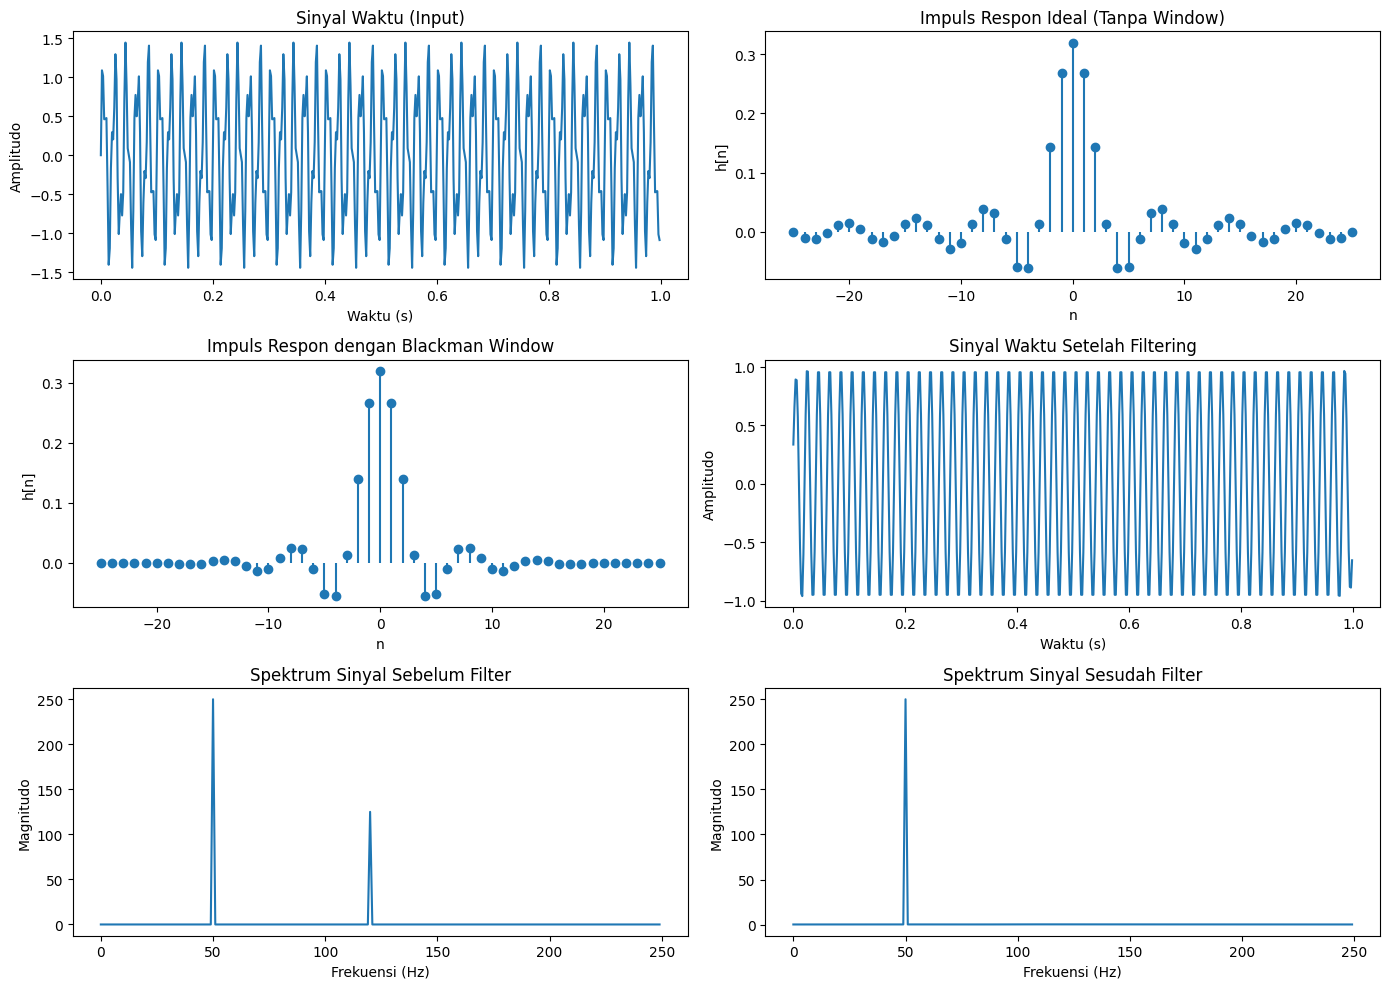

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# -----------------------------
# 1. Buat sinyal campuran
# -----------------------------
fs = 500            # sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # 1 detik
f1, f2 = 50, 120    # dua frekuensi (Hz)
x = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)

# -----------------------------
# 2. Impulse Response Ideal Lowpass Filter
# -----------------------------
fc = 80  # cutoff frequency
N = 51   # panjang filter
n = np.arange(-(N-1)//2, (N-1)//2 + 1)
h_ideal = 2*fc/fs * np.sinc(2*fc*n/fs)   # ideal LPF

# -----------------------------
# 3. Windowed Impulse Response (pakai Blackman)
# -----------------------------
window = np.blackman(N)
h_windowed = h_ideal * window

# -----------------------------
# 4. Filtering Sinyal
# -----------------------------
x_filtered = np.convolve(x, h_windowed, mode='same')

# -----------------------------
# 5. FFT untuk domain frekuensi
# -----------------------------
X = np.fft.fft(x)
Xf = np.fft.fft(x_filtered)
freq = np.fft.fftfreq(len(X), 1/fs)

# -----------------------------
# Plotting
# -----------------------------
plt.figure(figsize=(14,10))

# Sinyal waktu
plt.subplot(3,2,1)
plt.plot(t, x)
plt.title("Sinyal Waktu (Input)")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Impulse response asli
plt.subplot(3,2,2)
plt.stem(n, h_ideal, basefmt=" ")
plt.title("Impuls Respon Ideal (Tanpa Window)")
plt.xlabel("n")
plt.ylabel("h[n]")

# Impulse response dengan window
plt.subplot(3,2,3)
plt.stem(n, h_windowed, basefmt=" ")
plt.title("Impuls Respon dengan Blackman Window")
plt.xlabel("n")
plt.ylabel("h[n]")

# Sinyal hasil filtering di waktu
plt.subplot(3,2,4)
plt.plot(t, x_filtered)
plt.title("Sinyal Waktu Setelah Filtering")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Spektrum sebelum filter
plt.subplot(3,2,5)
plt.plot(freq[:len(freq)//2], np.abs(X[:len(X)//2]))
plt.title("Spektrum Sinyal Sebelum Filter")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitudo")

# Spektrum sesudah filter
plt.subplot(3,2,6)
plt.plot(freq[:len(freq)//2], np.abs(Xf[:len(Xf)//2]))
plt.title("Spektrum Sinyal Sesudah Filter")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitudo")

plt.tight_layout()
plt.show()


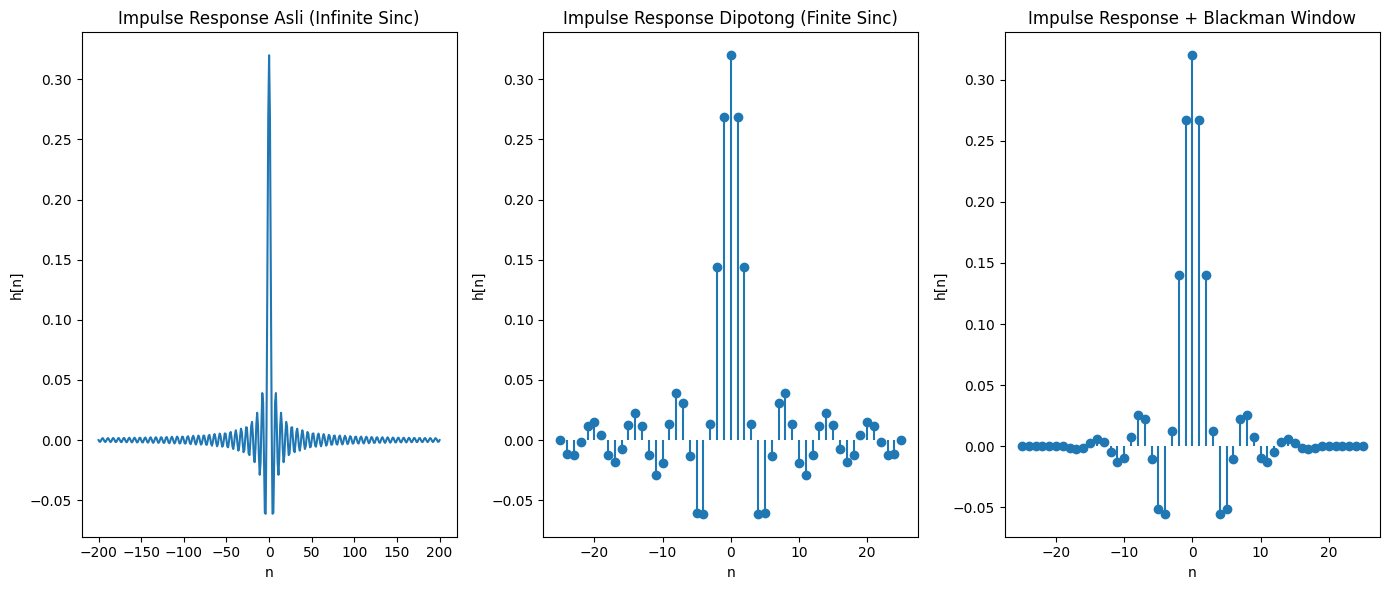

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter filter
fs = 500   # sampling frequency
fc = 80    # cutoff frequency
N = 51     # panjang filter (finite length)

# Rentang besar untuk sinc "asli"
n_long = np.arange(-200, 201)
h_infinite = 2*fc/fs * np.sinc(2*fc*n_long/fs)

# Rentang finite untuk implementasi
n_finite = np.arange(-(N-1)//2, (N-1)//2 + 1)
h_finite = 2*fc/fs * np.sinc(2*fc*n_finite/fs)

# Windowed version (Blackman)
window = np.blackman(N)
h_windowed = h_finite * window

# Plotting
plt.figure(figsize=(14,6))

# Impulse response asli (sinc panjang)
plt.subplot(1,3,1)
plt.plot(n_long, h_infinite)
plt.title("Impulse Response Asli (Infinite Sinc)")
plt.xlabel("n")
plt.ylabel("h[n]")

# Impulse response finite (tanpa window)
plt.subplot(1,3,2)
plt.stem(n_finite, h_finite, basefmt=" ")
plt.title("Impulse Response Dipotong (Finite Sinc)")
plt.xlabel("n")
plt.ylabel("h[n]")

# Impulse response finite + window
plt.subplot(1,3,3)
plt.stem(n_finite, h_windowed, basefmt=" ")
plt.title("Impulse Response + Blackman Window")
plt.xlabel("n")
plt.ylabel("h[n]")

plt.tight_layout()
plt.show()
